# Diabetes prediction based on k means clustering


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("diabetes.csv")

# Use only features
X = df.drop("Outcome", axis=1)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to original data
df["Cluster"] = kmeans.labels_

# Automatically assign risk labels based on average Glucose
cluster_means = df.groupby("Cluster")["Glucose"].mean().sort_values()

low = cluster_means.index[0]
moderate = cluster_means.index[1]
high = cluster_means.index[2]

risk_map = {
    low: "Low Risk",
    moderate: "Moderate Risk",
    high: "High Risk"
}


In [2]:
def predict_risk(input_data):
    
    # Create DataFrame with correct feature names
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Scale input
    input_scaled = scaler.transform(input_df)
    
    # Predict cluster
    cluster = kmeans.predict(input_scaled)[0]
    
    # Map to risk
    risk = risk_map[cluster]
    
    return risk


In [3]:
patient = [2, 150, 80, 25, 100, 30.5, 0.5, 45]

risk = predict_risk(patient)

print("Predicted Risk Level:", risk)


Predicted Risk Level: High Risk


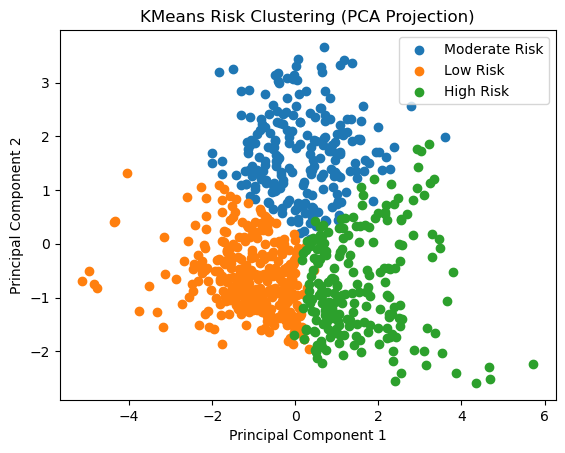

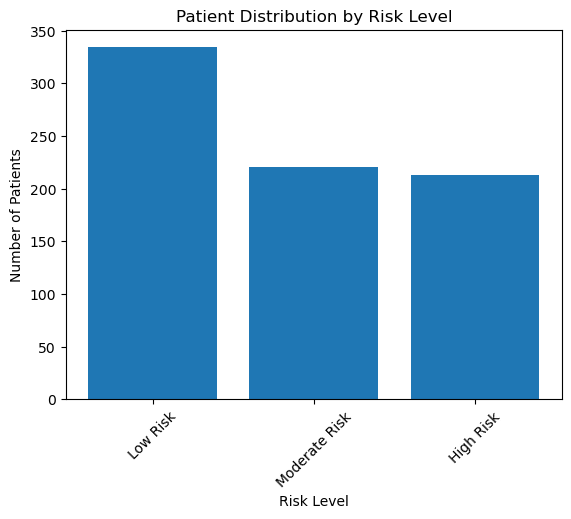

In [4]:
# ===============================
# KMeans Risk Clustering Visualization
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -------------------------------
#  Load Dataset
# -------------------------------
df = pd.read_csv("diabetes.csv")   
X = df.drop("Outcome", axis=1)

# -------------------------------
#  Scale the Data
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
#  Apply KMeans (3 Clusters)
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df["Cluster"] = kmeans.labels_

# -------------------------------
#  Assign Risk Labels
# -------------------------------
cluster_means = df.groupby("Cluster")["Glucose"].mean().sort_values()

low = cluster_means.index[0]
moderate = cluster_means.index[1]
high = cluster_means.index[2]

risk_map = {
    low: "Low Risk",
    moderate: "Moderate Risk",
    high: "High Risk"
}

df["Risk_Level"] = df["Cluster"].map(risk_map)

# -------------------------------
#  PCA for Visualization
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# -------------------------------
#  Plot 1: PCA Cluster Plot
# -------------------------------
plt.figure()

for risk in df["Risk_Level"].unique():
    subset = df[df["Risk_Level"] == risk]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=risk)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Risk Clustering (PCA Projection)")
plt.legend()
plt.show()

# -------------------------------
#  Plot 2: Risk Distribution
# -------------------------------
plt.figure()

risk_counts = df["Risk_Level"].value_counts()
plt.bar(risk_counts.index, risk_counts.values)

plt.xlabel("Risk Level")
plt.ylabel("Number of Patients")
plt.title("Patient Distribution by Risk Level")
plt.xticks(rotation=45)

plt.show()


In [7]:
patient = []

patient.append(float(input("Pregnancies: ")))
patient.append(float(input("Glucose: ")))
patient.append(float(input("Blood Pressure: ")))
patient.append(float(input("Skin Thickness: ")))
patient.append(float(input("Insulin: ")))
patient.append(float(input("BMI: ")))
patient.append(float(input("Diabetes Pedigree Function: ")))
patient.append(float(input("Age: ")))

risk = predict_risk(patient)

print("\nPatient Risk Level:", risk)


Pregnancies:  0
Glucose:  150
Blood Pressure:  140
Skin Thickness:  35
Insulin:  100
BMI:  30
Diabetes Pedigree Function:  1.112
Age:  40



Patient Risk Level: High Risk


In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "3"

In [ ]:
[4.0, 80.0, 120.0, 30.0, 10.0, 25.0, 0.110, 45.0]